# Harris Corner Detection

### Import resources and display image

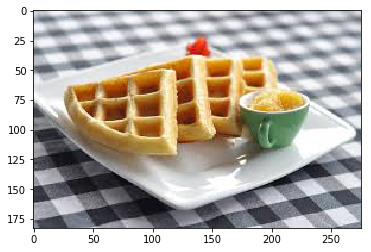

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

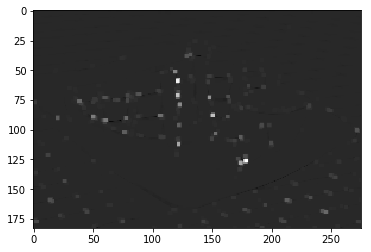

In [2]:
# Corner detection relies on changes in intensity, so we convert the image to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
# 2    --> size of the neighborhood to look at when identifying potential corners. 2 means 2x2
# 3    --> size of the Sobel_x and Sobel_y operator
# 0.04 --> a constant value that helps determine which points are considered corners (typycal value 0.04)
# if we choose a slightly lower value for the constant (< 0.04) will result in more corners detected
# dst will have corners marked as bright points and non-corners as darker pixels
dst = cv2.cornerHarris(gray, 2, 3, 0.04)  

# Dilate corner image to enhance corner points
# Dilation enlarges bright regions or regions in the foreground
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

### Extract and display strong corners

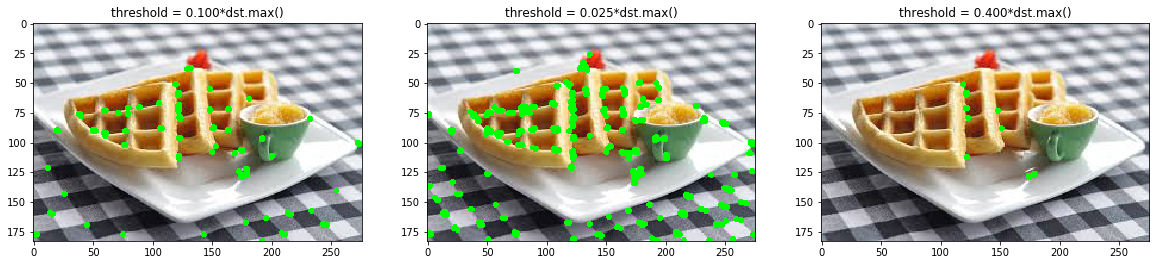

In [12]:
def mark_corners(gray_img_detected_corners, img_orig, threshold):
    # Iterate through all the corners and draw them on the image (if they pass the threshold)
    for j in range(0, gray_img_detected_corners.shape[0]):
        for i in range(0, gray_img_detected_corners.shape[1]):
            if(gray_img_detected_corners[j,i] > threshold):
                # image, center pt, radius, color, thickness
                cv2.circle( img_orig, (i, j), 1, (0,255,0), 1)
    return img_orig

# Create an image copy to draw corners on
corner_image_1 = np.copy(image_copy)
corner_image_2 = np.copy(image_copy)
corner_image_3 = np.copy(image_copy)

## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
thresh_1 = 0.100*dst.max()
thresh_2 = 0.025*dst.max()
thresh_3 = 0.400*dst.max()

f, (p1, p2, p3) = plt.subplots(1, 3, figsize=(20,10))

p1.set_title("threshold = 0.100*dst.max()")
p1.imshow(mark_corners(dst, corner_image_1, thresh_1))

p2.set_title("threshold = 0.025*dst.max()")
p2.imshow(mark_corners(dst, corner_image_2, thresh_2))

p3.set_title("threshold = 0.400*dst.max()")
p3.imshow(mark_corners(dst, corner_image_3, thresh_3))